1. Load the downloaded CSV using Pandas

In [22]:
import pandas as pd
data = pd.read_csv("train_users_2.csv")

2. Display the first 10 records from the CSV

In [3]:
data.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2.009032e+13,NaN,-unknown-,NaN,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2.009052e+13,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2.009061e+13,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2.009103e+13,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2.009121e+13,2010-02-18,-unknown-,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2.010010e+13,2010-01-02,-unknown-,NaN,basic,0.0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2.010010e+13,2010-01-05,FEMALE,46.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2.010010e+13,2010-01-13,FEMALE,47.0,basic,0.0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2.010010e+13,2010-07-29,FEMALE,50.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2.010010e+13,2010-01-04,-unknown-,46.0,basic,0.0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


3. Display the last 10 records from the CSV

In [4]:
data.tail(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
35708,au87ht5e1w,2012-08-09,2.012081e+13,NaN,MALE,59.0,facebook,0.0,en,direct,direct,tracked-other,Web,iPad,Mobile Safari,NDF
35709,dwrougjrad,2012-08-09,2.012081e+13,NaN,FEMALE,NaN,basic,0.0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
35710,75kp1fgjy1,2012-08-09,2.012081e+13,2012-08-19,FEMALE,26.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,other
35711,pig30bkmu6,2012-08-09,2.012081e+13,NaN,MALE,NaN,basic,0.0,en,other,other,tracked-other,Web,Mac Desktop,Chrome,NDF
35712,aa7959dw7e,2012-08-09,2.012081e+13,2012-08-09,FEMALE,47.0,basic,3.0,en,direct,direct,untracked,Web,Mac Desktop,Safari,US
35713,gepy8jjjnj,2012-08-09,2.012081e+13,2012-08-10,MALE,NaN,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Safari,US
35714,v24yoos66b,2012-08-09,2.012081e+13,2012-08-17,MALE,NaN,basic,0.0,en,sem-non-brand,google,omg,Web,Windows Desktop,IE,US
35715,rauhwnkcf5,2012-08-09,2.012081e+13,2012-08-09,-unknown-,38.0,basic,0.0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,other
35716,50epf7be5h,2012-08-09,2.012081e+13,2013-03-21,FEMALE,32.0,basic,1.0,en,sem-brand,google,linked,Web,Mac Desktop,Firefox,FR
35717,344r1m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Display the summary statistics of the data

In [5]:
data.describe()

,timestamp_first_active,age,signup_flow
count,3.571700e+04,23624.000000,35717.000000
mean,2.011576e+13,59.446876,1.352157
std,6.253539e+09,202.976343,2.066637
min,2.009032e+13,2.000000,0.000000
25%,2.011091e+13,30.000000,0.000000
50%,2.012023e+13,35.000000,0.000000
75%,2.012061e+13,44.000000,2.000000
max,2.012081e+13,2014.000000,25.000000


5. Get the list/tuple of destination country (unique) and create a dictionary with
key=Abbreviation Country, Value=number of occurrence/frequency
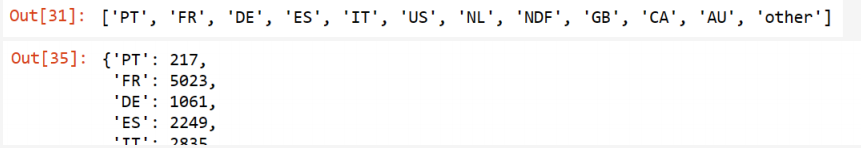

In [24]:
abbrev_country = data.country_destination.unique() #unique
print(abbrev_country)
frequency = data.country_destination.value_counts() #frequency counts
country_unique = {}
for c in abbrev_country:
  country_unique[c] = frequency[c]
print(country_unique)

['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']
{'NDF': 124543, 'US': 62376, 'other': 10094, 'FR': 5023, 'CA': 1428, 'GB': 2324, 'ES': 2249, 'IT': 2835, 'PT': 217, 'NL': 762, 'DE': 1061, 'AU': 539}


In [28]:
# or
keys = data.country_destination.value_counts().keys()
values = data.country_destination.value_counts().unique()
dictionary = {k: v for k, v in zip(keys, values)}
print(dictionary)

{'NDF': 124543, 'US': 62376, 'other': 10094, 'FR': 5023, 'IT': 2835, 'GB': 2324, 'ES': 2249, 'CA': 1428, 'DE': 1061, 'NL': 762, 'AU': 539, 'PT': 217}


6. From no. 5, create a function that
accepts the abbreviation string of
destination country to convert
the abbreviation into its full
name.
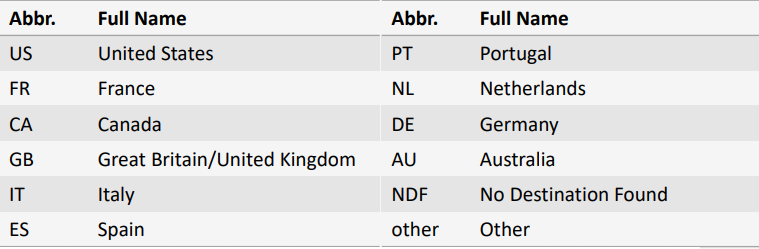
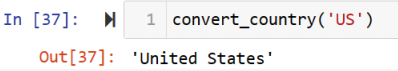

In [29]:
country = {'US':'United States', 'FR':'France', 'CA':'Canada', 'GB':'Great Britain/United Kingdom', 'IT':'Italy', 'ES':'Spain', 'PT':'Portugal', 'NL':'Netherlands', 'De':'Germany', 'AU':'Australia', 'NDF': 'No Destination Found', 'other':'Other'}

def convert_country(abbrev_country):
  if abbrev_country in country:
    return country[abbrev_country]

convert_country(input("Input Abbreviation Country: "))

Input Abbreviation Country: US


'United States'

7. Add a new column country_fullname to DataFrame by applying the funcation in No. 6
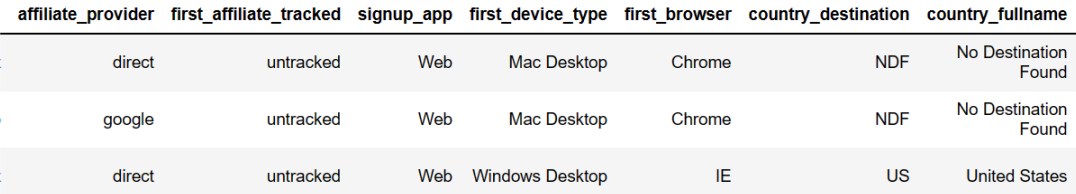

In [35]:
def full_name():
    data['country_fullname'] = data['country_destination'].apply(convert_country)
    return data

full_name()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,country_fullname
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,United States
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,No Destination Found
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,No Destination Found
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,No Destination Found
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,No Destination Found


In [34]:
# or
import numpy as np
country_dict = {'US':'United States', 'FR':'France', 'CA':'Canada', 'GB':'Great Britain/United Kingdom', 'IT':'Italy', 'ES':'Spain', 'PT':'Portugal', 'NL':'Netherlands', 'De':'Germany', 'AU':'Australia', 'NDF': 'No Destination Found', 'other':'Other'}

def conutry_converter_str(country):
  if country in country_dict.keys():
    return country_dict[country]
  else:
    return country

df_new = data
country_name_list = [conutry_converter_str(v) for v in np.array(data['country_destination'])]
df_new['country_fullname'] = country_name_list
df_new

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,country_fullname
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,United States
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,No Destination Found
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,No Destination Found
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,No Destination Found
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,No Destination Found


In [38]:
conutry_converter_str("PT")

'Portugal'

8. Create a new column gender_normalized. Its data is taken from
gender column and convert to 1 if male and 0 if female

In [ ]:
data['gender_normalized'] = data.gender.replace({'MALE':1, 'FEMALE':0})
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,country_fullname,gender_normalized
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found,-unknown-
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found,1
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,United States,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Other,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,United States,-unknown-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,No Destination Found,1
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,No Destination Found,-unknown-
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,No Destination Found,-unknown-
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,No Destination Found,-unknown-


In [36]:
# or
df_new['gender_normalized'] = data['gender']
df_new['gender_normalized'].replace(['FEMALE', 'MALE'], [0,1], inplace=True)
df_new.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,country_fullname,gender_normalized
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found,-unknown-
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found,1
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,United States,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Other,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,United States,-unknown-


9. Create a new column age_class. The data is taken from age column,
and convert into categorical data:
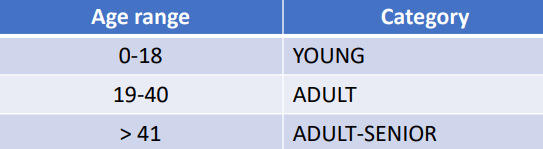

In [ ]:
data['age_class'] = pd.cut(data['age'], bins=[0,18,40,data.age.max()], labels = ['YOUNG', 'ADULT', 'ADULT-SENIOR'])
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,country_fullname,gender_normalized,age_class
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found,-unknown-,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found,1,ADULT
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,United States,0,ADULT-SENIOR
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Other,0,ADULT-SENIOR
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,United States,-unknown-,ADULT-SENIOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,No Destination Found,1,ADULT
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,No Destination Found,-unknown-,NaN
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,No Destination Found,-unknown-,ADULT
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,No Destination Found,-unknown-,NaN


In [40]:
# or
df_new['age_class'] = data["age"]
for i in range(0,5):
  if (df_new['age_class'][i]  >= 0 and df_new['age_class'][i] <= 18):
    df_new['age_class'][i] = "YOUNG"
  elif (df_new['age_class'][i]  >= 19 and df_new['age_class'][i] <= 40):
    df_new['age_class'][i] = "ADULT"
  elif (df_new['age_class'][i]  >= 41):
    df_new['age_class'][i] = "ADULT-SENIOR"
  else:
    df_new['age_class'][i] = df_new['age_class'][i]

df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, v

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,country_fullname,gender_normalized,age_class
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found,-unknown-,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,No Destination Found,1,ADULT
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,United States,0,ADULT-SENIOR
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Other,0,ADULT-SENIOR
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,United States,-unknown-,ADULT-SENIOR


10. Find out the percentage of male, female, unknown, other who
went/travel to US

In [ ]:
US = data[data['country_destination'] =='US']

In [ ]:
female = len(US[(US.gender_normalized == 0)])
percentage_female = (female/len(US)*100)
print("Persentase Wanita yang Pergi ke US adalah ",round(percentage_female,2), "%")

Persentase Wanita yang Pergi ke US adalah  36.38 %


In [ ]:
male = len(US[(US.gender_normalized == 1)])
percentage_male = (male/len(US)*100)
print("Persentase Pria yang Pergi ke US adalah ",round(percentage_male,2), "%")

Persentase Pria yang Pergi ke US adalah  31.19 %


In [ ]:
unknown = len(US[(US.gender_normalized == "-unknown-")])
percentage_unknown = (unknown/len(US)*100)
print("Presentase 'Unknown' yang Pergi ke US adalah ",round(percentage_unknown,2), "%")

Presentase 'Unknown' yang Pergi ke US adalah  32.24 %


In [ ]:
other = len(US[(US.gender_normalized == "OTHER")])
percentage_other = (other/len(US)*100)
print("Presentase 'Other' yang Pergi ke US adalah ",round(percentage_other,2), "%")

Presentase 'Other' yang Pergi ke US adalah  0.19 %


In [ ]:
# or

In [37]:
# memfilter data berdasarkan destinasi negara US
us_visit = df_new.loc[(df_new['country_destination'].isin(['US']))]
# menghitung total keseluruhan gender data
sum_to_us = us_visit['gender_normalized'].count()
# menghitung jumlah kunjungan ke US berdasarkan gender
visit_to_us = us_visit['country_destination'].groupby(df_new['gender_normalized']).count()
# menghitung persentase jumlah kunjungan ke US berdasarkan gender
us_percent = visit_to_us / sum_to_us * 100
us_percent.round(2)

gender_normalized
0            36.38
1            31.19
-unknown-    32.24
OTHER         0.19
Name: country_destination, dtype: float64